<a href="https://colab.research.google.com/github/Shravya2308/taylor-swift-lyric-analysis/blob/main/taylor_swift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

In [5]:
lyrics = pd.read_csv('taylor_swift_lyrics_2006-2022_all.csv')

In [6]:
lyrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9370 entries, 0 to 9369
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   album_name   9370 non-null   object
 1   track_title  9370 non-null   object
 2   track_n      9370 non-null   int64 
 3   lyric        9370 non-null   object
 4   line         9370 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 366.1+ KB


In [7]:
print(lyrics['album_name'].unique())

['Fearless (Taylor’s Version)' 'Red (Deluxe Edition)' '1989 (Deluxe)'
 'midnights' 'midnights (3am edition)' 'reputation' 'Taylor Swift'
 'folklore (deluxe version)' 'Lover' 'evermore (deluxe version)'
 'Speak Now (Deluxe)']


In [8]:
print(lyrics.album_name.unique())

['Fearless (Taylor’s Version)' 'Red (Deluxe Edition)' '1989 (Deluxe)'
 'midnights' 'midnights (3am edition)' 'reputation' 'Taylor Swift'
 'folklore (deluxe version)' 'Lover' 'evermore (deluxe version)'
 'Speak Now (Deluxe)']


In [9]:
def album_details(row):
   if row['album_name'] == 'Taylor Swift':
        return '2006'
   elif row['album_name'] == 'Fearless (Taylor’s Version)':
        return '2008'
   elif row['album_name'] == 'Speak Now (Deluxe)':
        return '2010'
   elif row['album_name'] == 'Red (Deluxe Edition)':
        return '2012'
   elif row['album_name'] == '1989 (Deluxe)':
        return '2014'
   elif row['album_name'] == 'reputation':
        return '2017'
   elif row['album_name'] == 'Lover':
        return '2019'
   elif row['album_name'] == 'evermore (deluxe version)':
        return '2020'
    #ok, we know folklore was actually released in Dec 2020, but this will make our analysis easier
   elif row['album_name'] == 'folklore (deluxe version)':
        return '2021'
    #this is slightly differently formatted because the album name is recorded two ways.
   elif 'midnights' in row['album_name']:
        return '2022'
   return 'No Date'
        

In [10]:
lyrics['album_year'] = lyrics.apply(lambda x:album_details(x),axis=1)

In [11]:
lyrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9370 entries, 0 to 9369
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   album_name   9370 non-null   object
 1   track_title  9370 non-null   object
 2   track_n      9370 non-null   int64 
 3   lyric        9370 non-null   object
 4   line         9370 non-null   int64 
 5   album_year   9370 non-null   object
dtypes: int64(2), object(4)
memory usage: 439.3+ KB


In [12]:
lyrics.head


<bound method NDFrame.head of                        album_name                  track_title  track_n  \
0     Fearless (Taylor’s Version)  Fearless (Taylor’s Version)        1   
1     Fearless (Taylor’s Version)  Fearless (Taylor’s Version)        1   
2     Fearless (Taylor’s Version)  Fearless (Taylor’s Version)        1   
3     Fearless (Taylor’s Version)  Fearless (Taylor’s Version)        1   
4     Fearless (Taylor’s Version)  Fearless (Taylor’s Version)        1   
...                           ...                          ...      ...   
9365           Speak Now (Deluxe)                     Superman       17   
9366           Speak Now (Deluxe)                     Superman       17   
9367           Speak Now (Deluxe)                     Superman       17   
9368           Speak Now (Deluxe)                     Superman       17   
9369           Speak Now (Deluxe)                     Superman       17   

                                                  lyric  line album_y

In [13]:
lyrics['clean_lyric']=lyrics['lyric'].str.lower()

In [14]:
print(lyrics['clean_lyric'])

0                         there's something 'bout the way
1                  the street looks when it's just rained
2       there's a glow off the pavement, you walk me t...
3       and you know i wanna ask you to dance right there
4                  in the middle of the parking lot, yeah
                              ...                        
9365                     i'll be right here on the ground
9366                              when you come back down
9367                               la, la, la, la, la, la
9368                               la, la, la, la, la, la
9369                              when you come back down
Name: clean_lyric, Length: 9370, dtype: object


In [15]:
lyrics['clean_lyric']= lyrics['clean_lyric'].str.replace('[^\w\s]','',regex =True)

In [16]:
lyrics['clean_lyric_list'] = lyrics['clean_lyric'].apply(lambda x: x.split())
print(lyrics.head())

                    album_name                  track_title  track_n  \
0  Fearless (Taylor’s Version)  Fearless (Taylor’s Version)        1   
1  Fearless (Taylor’s Version)  Fearless (Taylor’s Version)        1   
2  Fearless (Taylor’s Version)  Fearless (Taylor’s Version)        1   
3  Fearless (Taylor’s Version)  Fearless (Taylor’s Version)        1   
4  Fearless (Taylor’s Version)  Fearless (Taylor’s Version)        1   

                                               lyric  line album_year  \
0                    There's something 'bout the way     1       2008   
1             The street looks when it's just rained     2       2008   
2  There's a glow off the pavement, you walk me t...     3       2008   
3  And you know I wanna ask you to dance right there     4       2008   
4             In the middle of the parking lot, yeah     5       2008   

                                         clean_lyric  \
0                      theres something bout the way   
1              t

In [17]:
stop = [ 'a', 'this', 'that', 'to', 'is', 'am', 'was', 'were', 'be', 'being', 'been']


In [18]:
lyrics['clean_lyric_list_rejoined'] = lyrics['clean_lyric_list'].apply(lambda x: ' '.join(x))
print(lyrics.head())

                    album_name                  track_title  track_n  \
0  Fearless (Taylor’s Version)  Fearless (Taylor’s Version)        1   
1  Fearless (Taylor’s Version)  Fearless (Taylor’s Version)        1   
2  Fearless (Taylor’s Version)  Fearless (Taylor’s Version)        1   
3  Fearless (Taylor’s Version)  Fearless (Taylor’s Version)        1   
4  Fearless (Taylor’s Version)  Fearless (Taylor’s Version)        1   

                                               lyric  line album_year  \
0                    There's something 'bout the way     1       2008   
1             The street looks when it's just rained     2       2008   
2  There's a glow off the pavement, you walk me t...     3       2008   
3  And you know I wanna ask you to dance right there     4       2008   
4             In the middle of the parking lot, yeah     5       2008   

                                         clean_lyric  \
0                      theres something bout the way   
1              t

In [19]:
lyrics['clean_lyric']=lyrics['clean_lyric'].apply(lambda x:' '.join(word for word in x.split() if word not in stop))

In [20]:
print(lyrics['clean_lyric'])

0                          theres something bout the way
1                  the street looks when its just rained
2       theres glow off the pavement you walk me the car
3         and you know i wanna ask you dance right there
4                  in the middle of the parking lot yeah
                              ...                       
9365                        ill right here on the ground
9366                             when you come back down
9367                                   la la la la la la
9368                                   la la la la la la
9369                             when you come back down
Name: clean_lyric, Length: 9370, dtype: object


In [21]:
lyrics['midnight'] = lyrics['clean_lyric'].str.contains('midnight')

In [22]:
print(lyrics['midnight'])

0       False
1       False
2       False
3       False
4       False
        ...  
9365    False
9366    False
9367    False
9368    False
9369    False
Name: midnight, Length: 9370, dtype: bool


In [23]:
sum(lyrics['midnight'])

20

In [24]:
night = ['night','midnight', 'dawn', 'dusk', 'evening', 'late', 'dark', '1am', '2am', '3am', '4am']
day = ['day', 'morning', 'light', 'sun', 'dawn', 'noon', 'golden', 'bright']
time = ['today', 'tomorrow', 'yesterday']

In [25]:
night_regex = '|'.join(night)
day_regex = '|'.join(day)
time_regex = '|'.join(time)

In [26]:
lyrics['night']=lyrics['clean_lyric'].str.contains(night_regex)
lyrics['day']=lyrics['clean_lyric'].str.contains(day_regex)
lyrics['time']=lyrics['clean_lyric'].str.contains(time_regex)

In [27]:
night_ref_count = sum(lyrics['night'])
day_ref_count = sum(lyrics['day'])
time_ref_count = sum(lyrics['time'])

In [28]:
print("night refrences are:",night_ref_count)
print("day refrences are:",day_ref_count)
print("time refrences are:",time_ref_count)

night refrences are: 287
day refrences are: 387
time refrences are: 35


In [29]:
lyrics.head()

,album_name,track_title,track_n,lyric,line,album_year,clean_lyric,clean_lyric_list,clean_lyric_list_rejoined,midnight,night,day,time
0,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,There's something 'bout the way,1,2008,theres something bout the way,"[theres, something, bout, the, way]",theres something bout the way,False,False,False,False
1,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,The street looks when it's just rained,2,2008,the street looks when its just rained,"[the, street, looks, when, its, just, rained]",the street looks when its just rained,False,False,False,False
2,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,"There's a glow off the pavement, you walk me t...",3,2008,theres glow off the pavement you walk me the car,"[theres, a, glow, off, the, pavement, you, wal...",theres a glow off the pavement you walk me to ...,False,False,False,False
3,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,And you know I wanna ask you to dance right there,4,2008,and you know i wanna ask you dance right there,"[and, you, know, i, wanna, ask, you, to, dance...",and you know i wanna ask you to dance right there,False,False,False,False
4,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,"In the middle of the parking lot, yeah",5,2008,in the middle of the parking lot yeah,"[in, the, middle, of, the, parking, lot, yeah]",in the middle of the parking lot yeah,False,False,False,False


In [40]:
lr = lyrics.groupby('album_year').sum().reset_index()

In [41]:
lr

,album_year,track_n,line,midnight,night,day,time
0,2006,4867,13456,0,19,25,3
1,2008,15644,27793,0,42,65,20
2,2010,8450,27489,0,31,53,4
3,2012,11992,27800,1,48,53,7
4,2014,8424,33546,2,27,41,0
5,2017,7640,33775,3,25,25,0
6,2019,8813,25741,0,22,46,0
7,2020,8443,25712,2,18,38,0
8,2021,6193,16854,1,8,17,1
9,2022,10553,27345,11,47,24,0


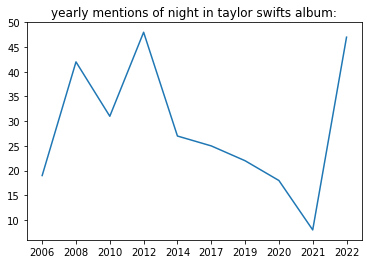

In [42]:
plt.plot(lr['album_year'], lr['night'])
plt.title('yearly mentions of night in taylor swifts album:')
plt.show()

In [43]:
year_names = pd.read_csv('album_year_name.csv')

year_names['album_year']= year_names['album_year'].apply(str)

In [48]:
ara=pd.merge(lr, year_names, on="album_year")
ara

,album_year,track_n,line,midnight,night,day,time,Unnamed: 0,album_name
0,2006,4867,13456,0,19,25,3,4236,Taylor Swift
1,2008,15644,27793,0,42,65,20,0,Fearless (Taylor’s Version)
2,2010,8450,27489,0,31,53,4,7413,Speak Now (Deluxe)
3,2012,11992,27800,1,48,53,7,1170,Red (Deluxe Edition)
4,2014,8424,33546,2,27,41,0,2242,1989 (Deluxe)
5,2017,7640,33775,3,25,25,0,3248,reputation
6,2019,8813,25741,0,22,46,0,5567,Lover
7,2020,8443,25712,2,18,38,0,6501,evermore (deluxe version)
8,2021,6193,16854,1,8,17,1,4845,folklore (deluxe version)
9,2022,10553,27345,11,47,24,0,8000,Midnights


In [49]:
lr=pd.merge(lr, year_names, on="album_year")

In [50]:
lr

,album_year,track_n,line,midnight,night,day,time,Unnamed: 0,album_name
0,2006,4867,13456,0,19,25,3,4236,Taylor Swift
1,2008,15644,27793,0,42,65,20,0,Fearless (Taylor’s Version)
2,2010,8450,27489,0,31,53,4,7413,Speak Now (Deluxe)
3,2012,11992,27800,1,48,53,7,1170,Red (Deluxe Edition)
4,2014,8424,33546,2,27,41,0,2242,1989 (Deluxe)
5,2017,7640,33775,3,25,25,0,3248,reputation
6,2019,8813,25741,0,22,46,0,5567,Lover
7,2020,8443,25712,2,18,38,0,6501,evermore (deluxe version)
8,2021,6193,16854,1,8,17,1,4845,folklore (deluxe version)
9,2022,10553,27345,11,47,24,0,8000,Midnights


In [53]:
lr.sort_values(by='night',ascending=False)

,album_year,track_n,line,midnight,night,day,time,Unnamed: 0,album_name
3,2012,11992,27800,1,48,53,7,1170,Red (Deluxe Edition)
9,2022,10553,27345,11,47,24,0,8000,Midnights
1,2008,15644,27793,0,42,65,20,0,Fearless (Taylor’s Version)
2,2010,8450,27489,0,31,53,4,7413,Speak Now (Deluxe)
4,2014,8424,33546,2,27,41,0,2242,1989 (Deluxe)
5,2017,7640,33775,3,25,25,0,3248,reputation
6,2019,8813,25741,0,22,46,0,5567,Lover
0,2006,4867,13456,0,19,25,3,4236,Taylor Swift
7,2020,8443,25712,2,18,38,0,6501,evermore (deluxe version)
8,2021,6193,16854,1,8,17,1,4845,folklore (deluxe version)


In [54]:
lr.sort_values(by='day',ascending = False)

,album_year,track_n,line,midnight,night,day,time,Unnamed: 0,album_name
1,2008,15644,27793,0,42,65,20,0,Fearless (Taylor’s Version)
2,2010,8450,27489,0,31,53,4,7413,Speak Now (Deluxe)
3,2012,11992,27800,1,48,53,7,1170,Red (Deluxe Edition)
6,2019,8813,25741,0,22,46,0,5567,Lover
4,2014,8424,33546,2,27,41,0,2242,1989 (Deluxe)
7,2020,8443,25712,2,18,38,0,6501,evermore (deluxe version)
0,2006,4867,13456,0,19,25,3,4236,Taylor Swift
5,2017,7640,33775,3,25,25,0,3248,reputation
9,2022,10553,27345,11,47,24,0,8000,Midnights
8,2021,6193,16854,1,8,17,1,4845,folklore (deluxe version)


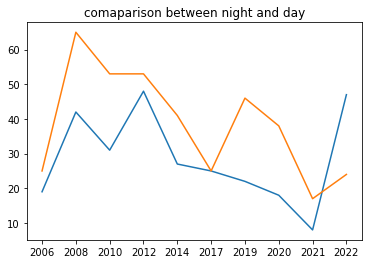

In [55]:
plt.plot(lr['album_year'], lr['night'],label='night')
plt.plot(lr['album_year'], lr['day'],label='day')
plt.title('comaparison between night and day')
plt.show()

In [60]:
lyrics['tok']=lyrics['clean_lyric'].str.split(' ')

In [61]:
lyrics.head()

,album_name,track_title,track_n,lyric,line,album_year,clean_lyric,clean_lyric_list,clean_lyric_list_rejoined,midnight,night,day,time,tok
0,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,There's something 'bout the way,1,2008,theres something bout the way,"[theres, something, bout, the, way]",theres something bout the way,False,False,False,False,"[theres, something, bout, the, way]"
1,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,The street looks when it's just rained,2,2008,the street looks when its just rained,"[the, street, looks, when, its, just, rained]",the street looks when its just rained,False,False,False,False,"[the, street, looks, when, its, just, rained]"
2,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,"There's a glow off the pavement, you walk me t...",3,2008,theres glow off the pavement you walk me the car,"[theres, a, glow, off, the, pavement, you, wal...",theres a glow off the pavement you walk me to ...,False,False,False,False,"[theres, glow, off, the, pavement, you, walk, ..."
3,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,And you know I wanna ask you to dance right there,4,2008,and you know i wanna ask you dance right there,"[and, you, know, i, wanna, ask, you, to, dance...",and you know i wanna ask you to dance right there,False,False,False,False,"[and, you, know, i, wanna, ask, you, dance, ri..."
4,Fearless (Taylor’s Version),Fearless (Taylor’s Version),1,"In the middle of the parking lot, yeah",5,2008,in the middle of the parking lot yeah,"[in, the, middle, of, the, parking, lot, yeah]",in the middle of the parking lot yeah,False,False,False,False,"[in, the, middle, of, the, parking, lot, yeah]"
